# 1.1. Web Server

- 웹서버는 HTTP 요청을 읽어, 응답을 해주는 프로그램
- 웹서버 프로그램을 서버 상에 설치하여 특정 HTTP 요청에 따라 서비스를 제공해주는 방식으로 웹서비스 구현
- 주로 사용되는 웹서버로는 Apache 와 Nginx 존재

# 1.2. Apache vs Nginx

### **`Apache`**

- Apache 는 오픈 소스 프로젝트
- 지난 수십년 간 사용되어 온 안정성 높은 웹서버

### **`Apache 구동 방식`**

- Apache 는 꾸준히 성능을 개선 중이며, 아래와 같이 두 가지 방식을 지원
    - **Prefork MPM**(Multi Processing Module)
        - HTTP 요청이 발생할 때마다, Process 복제하여 별도의 Process 에서 해당 요청을 처리

    - **Worker MPM**(Multi Processing Module)
        - 하나의 Process 안에서 thread 단위로 요청을 처리하는 기능
<br>
<br>
- 하지만 결국, 다수의 HTTP 요청을 처리할 때, Process 혹은 Thread 를 생성해야 한다는 단점이 존재

### **`Nginx 구동 방식`**

- **Event Driven**
    - 하나의 Process 로 동작, HTTP 요청을 하나의 Event 로 정의
    - 각각의 요청을 비동기적으로(병렬적으로) 처리 가능
        - 대부분의 HTTP 응답은 결국 Html 파일을 제공하는 것이므로 IO 작업
        - IO 작업은 저장매체에서 파일을 읽어오는 것이므로 CPU 작업과는 거리가 멀다.
        - 따라서, 하나의 IO 작업으로 각각의 HTTP 요청들을 포워딩하고, 요청 순이 아닌, 요청 작업이 완료된 순으로 처리
    - HTTP 요청마다 Process 혹은 Thread 를 생성하지 않으므로, 시스템 리소스 관리에 장점
    - 보통 많은 접속자가 있을 경우, 시스템 자원 관리의 효율성 때문에 Nginx 가 일반적으로 성능이 좋을 수 있음
        - Html 파일의 사이즈, 사용하는 추가 기능 등등의 다양한 조건들 때문에 모든 상황에서 성능이 우수하다고는 볼 수 없다.

# 1.3. Nginx Reverse Proxy

### **`Proxy Server`**

- 클라이언트가 자신을 통해 다른 네트워크 서비스에 접속할 수 있게 해주는 서버

### **`Forward Proxy`**

- 클라이언트가 외부 인터넷에 직접 접근하는 것이 아니라, Proxy Server 에 먼저 인터넷 접근 요청을 수행
<br>
<br>
- Proxy Server 가 외부 인터넷에 대신 접속하여 결과를 받은 후, 클라이언트에게 전달하는 서버
<br>
<br>
- 이를 통해 클라이언트의 요청을 제어할 수 있으며, 자주 사용하는 데이터들에 대해 캐싱하여 성능 향상을 얻을 수 있다.

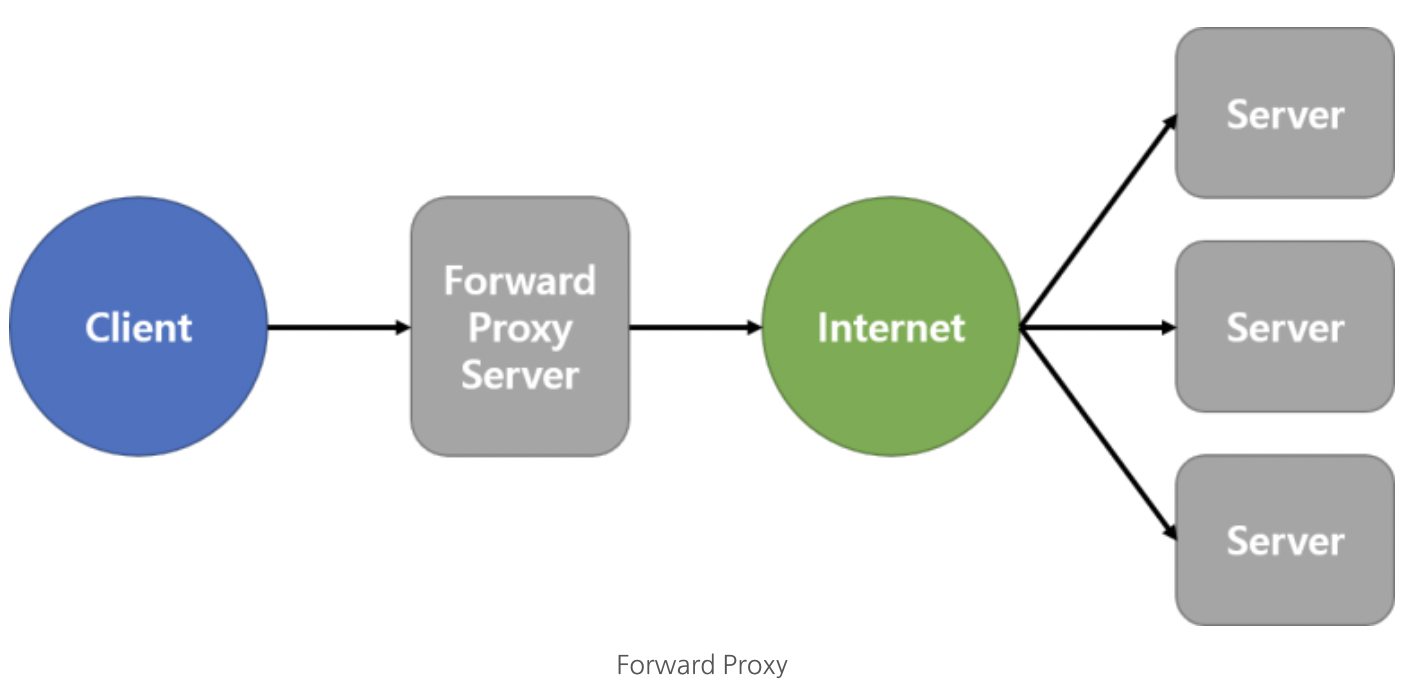

### **`Reverse Proxy`**

- Forward Proxy 의 반대 개념
<br>
<br>
- 클라이언트가 Reverse Proxy 에 요청하면, Reverse Proxy 가 관련 요청에 따라 적절한 내부 서버에 접속하여 결과를 받은 후 클라이언트에게 전달
<br>
<br>
- 내부 DB 에 대한 직접 접근을 허용하지 않을 수 있어 보안 향상
<br>
<br>
- 로드 밸런싱(Load Balancing)으로 트래픽 관리도 가능
<br>
<br>
- 클라이언트의 요청 엔드포인트가 실제 서버의 주소인 Forward Proxy 의 경우와는 다르게, Reverse Proxy 에서 클라이언트는 실제 서버 주소를 알지 못한다.
<br>
<br>
- 클라이언트는 Reverse Proxy 의 주소로 요청을 보내게 된다.

- **Nginx 에서는 이러한 Reverse Proxy Server 의 기능을 제공**하고 있으며,
<br>
<br>
- Nginx 가 **각각의 요청을 적절한 서버에 분배하기 위해 이를 구분 및 식별하는 방법**은 아래 두 가지가 있다.
    - **Port** 로 구분
    - **URL** 로 구분

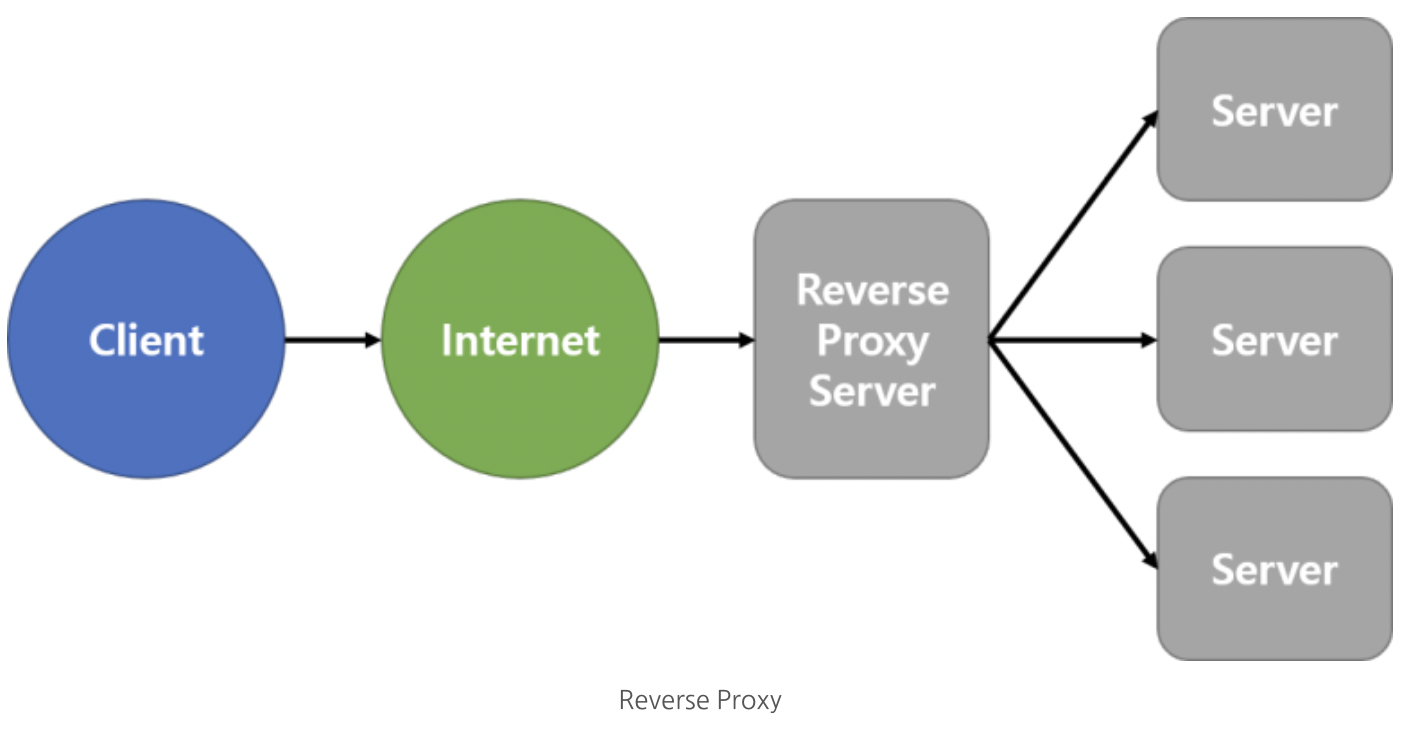